### **CBOE Volatility Index 2004-2020 Economic Analysis**

---



By: Jaden Stromberg

# **Introduction**

**This analysis is based on the CBOE Volatility Index (VIX) dataset, sourced from Kaggle:**
* https://www.kaggle.com/datasets/tunguz/vix-cboe-volatility-index

The dataset spans from 2004 to 2020 and includes the daily open, high, low, and close values of the VIX. These values are a key indicator of market sentiment and expected volatility. Additionally, the VIX reflects market traders expectations for short term volatility in the S&P 500.

The central question guiding this project is:

**Is there a statistically significant difference in VIX behavior between recession and non-recession periods from 2004 to 2020?**

By applying hypothesis testing to recession-labeled and non-recession periods, this analysis aims to find whether market volatility consistently increases during economic downturns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/vix-daily_csv.csv")
df['Date'] = pd.to_datetime(df['Date'])

Mounted at /content/drive


**VIX Open:** The VIX value at the start of the trading day.


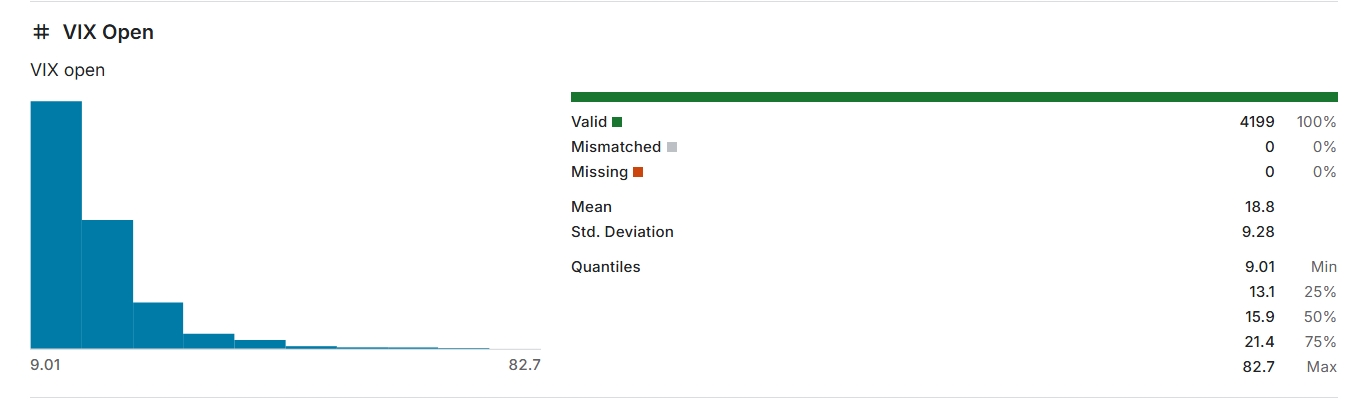

**VIX High:** The highest VIX value during the trading day.

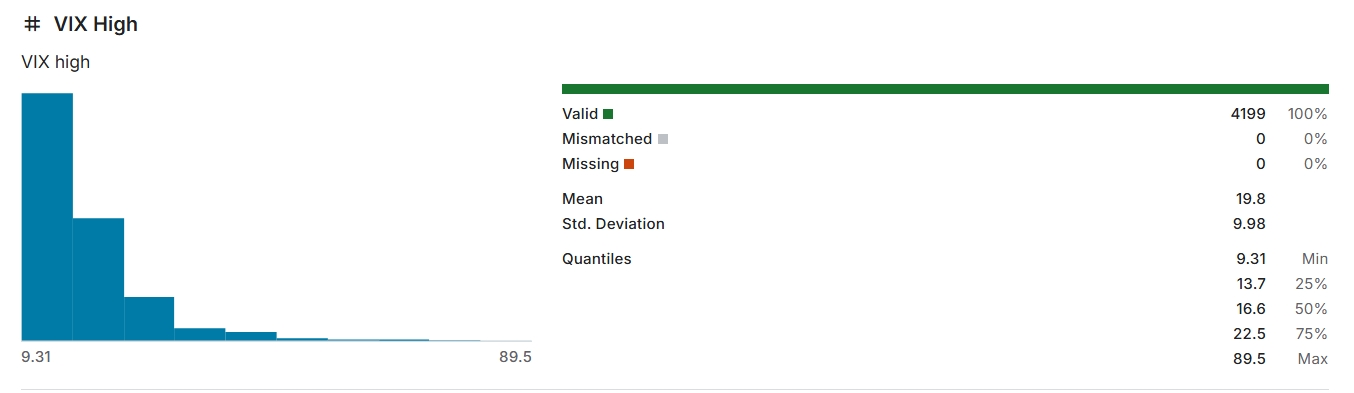

**VIX Low:** The lowest VIX value during the trading day.

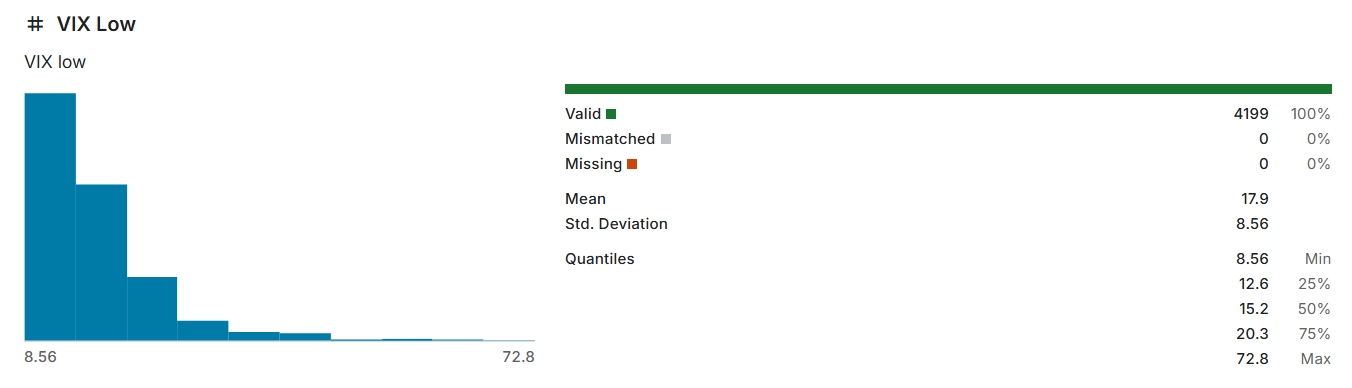

**VIX Close:** The VIX value at the end of the trading day.

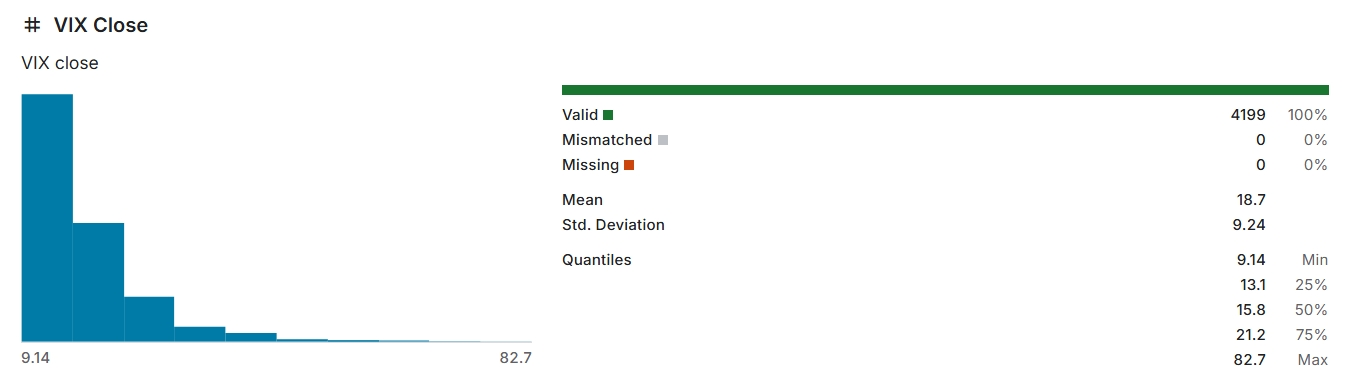

# **Exploring Data:**

This time series plot displays the VIX Close from 2004 to 2020, allowing us to visually identify how market volatility fluctuates over time. Noticeable spikes often align with major economic downturns, helping us understand how investor sentiment changes during times of uncertainty.

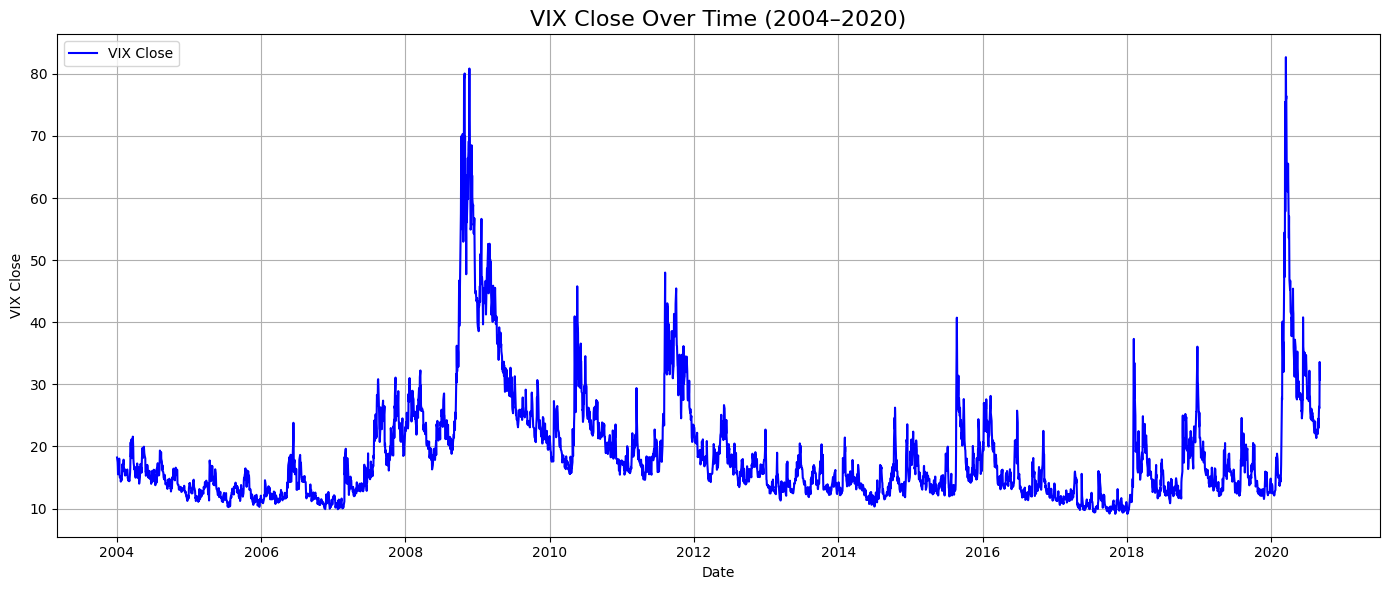

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['VIX Close'], label='VIX Close', color='blue')
plt.title('VIX Close Over Time (2004–2020)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('VIX Close')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Data Analysis:**

This box plot compares the distribution of VIX Close values between recession and non-recession periods. It visually shows us differences in volatility behavior across economic cycles, helping us determine if recessions significantly impact investor fear.

We observe  outliers such as on
* October 24, 2008 (VIX Close: 80.86)
* March 16, 2020 (VIX Close: 82.69)

Which corresponds to the major 2008 financial crisis and the start of the COVID-19 pandemic. These spikes highlight how recessions amplify volatility beyond typical market fluctuations. Furthermore, non-recession periods show lower VIX values, with fewer extreme spikes.

**Statistics Summary**
* Mean VIX: 18.73
* Median VIX: 15.80
* Standard Deviation: 9.24
* Min VIX: 9.14
* Max VIX: 82.69
* Skewness: 2.66 (Right Skewed)




In [ ]:
mean = df['VIX Close'].mean()
median = df['VIX Close'].median()
std_dev = df['VIX Close'].std()
max_vix = df['VIX Close'].max()
min_vix = df['VIX Close'].min()
skew = df['VIX Close'].skew()

print(f"Mean VIX: {mean:.2f}")
print(f"Median VIX: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Min VIX: {min_vix}")
print(f"Max VIX: {max_vix}")
print(f"Skewness: {skew:.2f}")


Mean VIX: 18.73
Median VIX: 15.80
Standard Deviation: 9.24
Min VIX: 9.14
Max VIX: 82.69
Skewness: 2.66


In [ ]:
df['Recession'] = df['Date'].apply(lambda x: 'Recession' if (
    (pd.Timestamp('2007-12-01') <= x <= pd.Timestamp('2009-06-30')) or
    (pd.Timestamp('2020-02-01') <= x <= pd.Timestamp('2020-04-30'))
) else 'Non-Recession')


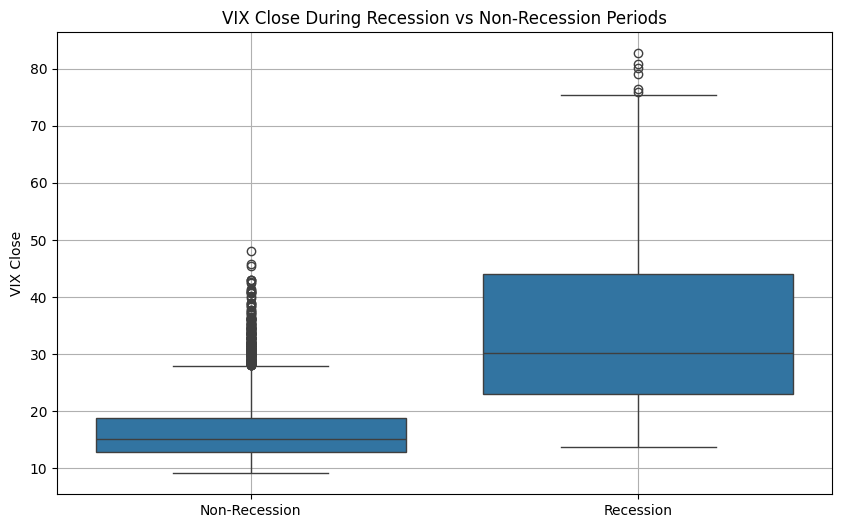

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recession', y='VIX Close', data=df)
plt.title('VIX Close During Recession vs Non-Recession Periods')
plt.ylabel('VIX Close')
plt.xlabel('')
plt.grid(True)
plt.show()


# **Conclusion:**

This analysis shows there is a significant difference in VIX volatility between recession and non-recession years from 2004 to 2020. During recessions, the VIX spikes much higher, reflecting greater investor fear and market uncertainty. Non-recession periods have lower and more stable volatility overall.

In short, recessions clearly have a strong impact on the VIX, confirming that market fear intensifies during economic downturns.